In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import subprocess

In [18]:
os.remove("stats.txt")
P_s = {0, 1, 2, 4, 8, 16} # 0 - без параллельного кода
n_s = {10, 100, 1000, 10000, 100000, 1000000, 10000000}
m_s = {10, 100, 500, 1000, 10000}
for P in P_s:
    for n in n_s:
        for m in m_s:
            os.system("./3 %d %d %d "%(n, m, P))

In [19]:
data = pd.read_csv("stats.txt", delimiter=' ', header=None)
data.columns = ['t', 'n', 'm', 'P']
data['t'] = data['t'].apply(lambda s: float(s[:-1]))
data = data.sort_values(['P', 'n'])

In [20]:
#data

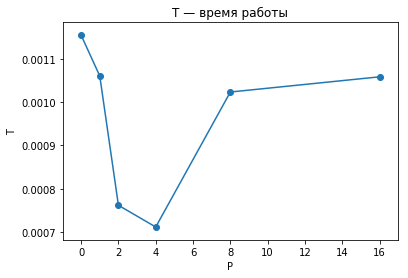

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


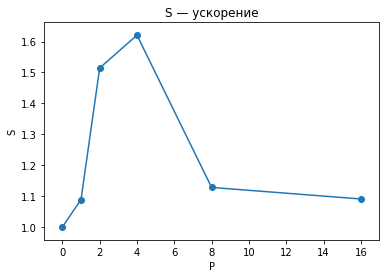

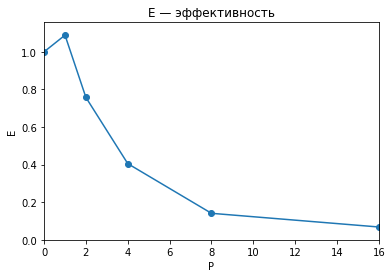

In [24]:
N = 1000000
m = 100
dat = data[data['n']==n].sort_values('P')
y = np.array(dat['t'][dat['m']==m])

plt.figure()
x = np.array(dat['P'][dat['m']==m])
plt.plot(x, y)
plt.scatter(x, y)
plt.title('T — время работы')
plt.xlabel('P')
plt.ylabel('T')
plt.show()

T_0 = np.array(data[data['P']==0].sort_values('n')[data['n']==n][dat['m']==m]['t'])
plt.figure()
y = np.array(T_0/dat[dat['m']==m]['t'])
x = np.array(dat['P'][dat['m']==m])
plt.plot(x, y)
plt.scatter(x, y)
plt.title('S — ускорение')
plt.xlabel('P')
plt.ylabel('S')
plt.show()

plt.figure()
x = np.array(dat['P'][dat['m']==m])
P_to_divide = np.array(dat['P'][dat['m']==m])
P_to_divide[0] = 1
y = np.array(T_0/np.array(dat['t'][dat['m']==m])/P_to_divide)
plt.plot(x, y)
plt.scatter(x, y)
plt.title('E — эффективность')
plt.xlabel('P')
plt.ylabel('E')
plt.xlim(np.min(dat['P']), np.max(dat['P']))
plt.show()